<a href="https://colab.research.google.com/github/petervinhchau/public/blob/main/2025_project1_questions_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




[1] "mean: 1.84666666666667"
[1] "var: 1.86522803114572"


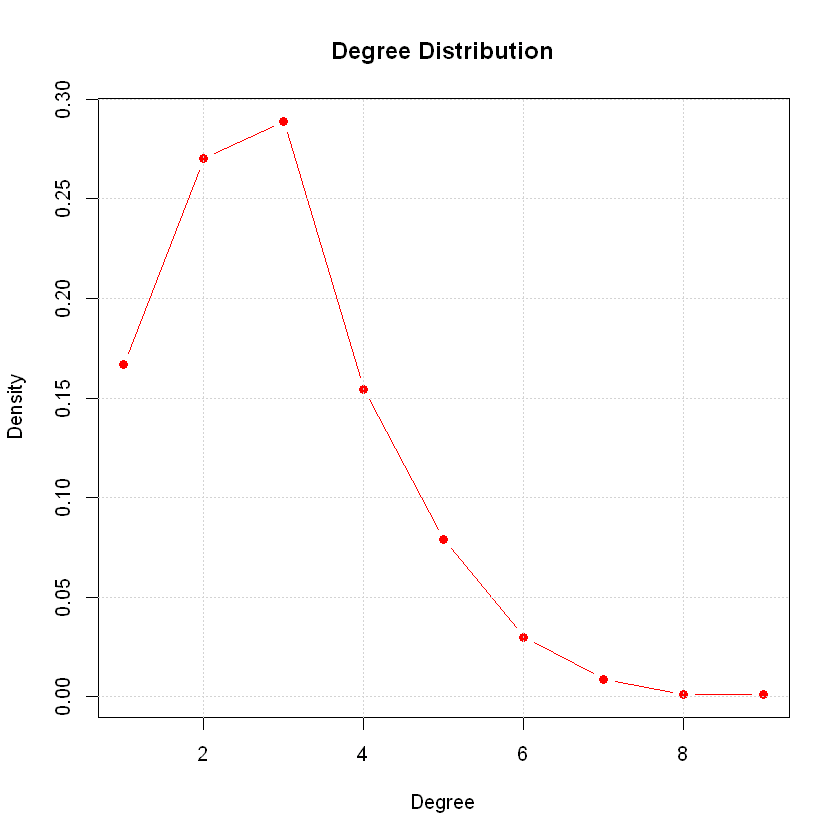

[1] "mean: 5.38888888888889"
[1] "var: 5.31689531578297"


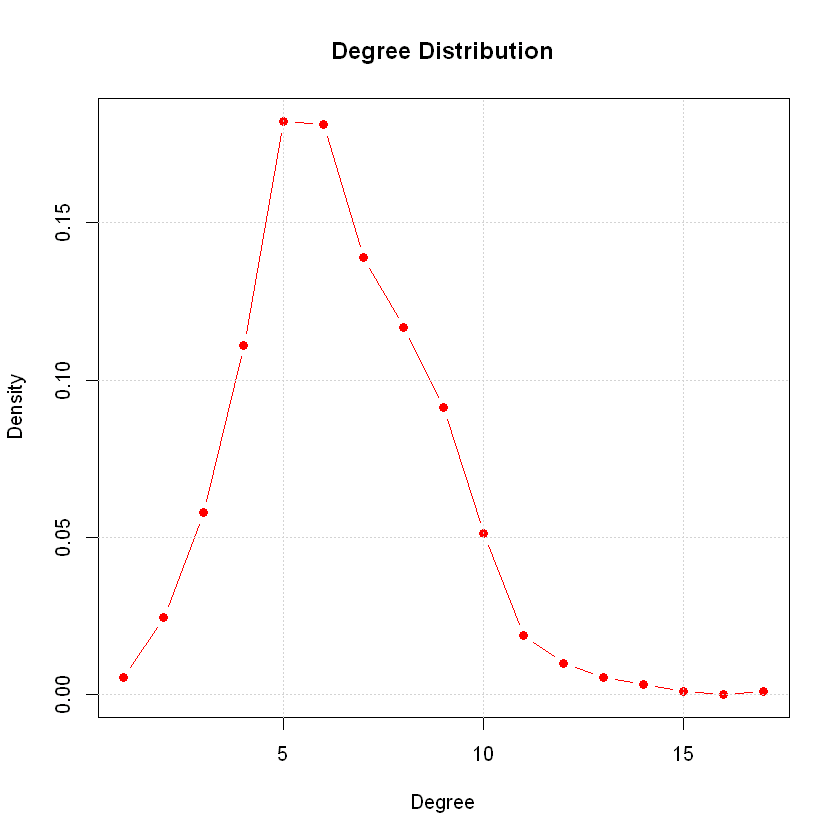

[1] "mean: 10.9933333333333"
[1] "var: 10.9343270300334"


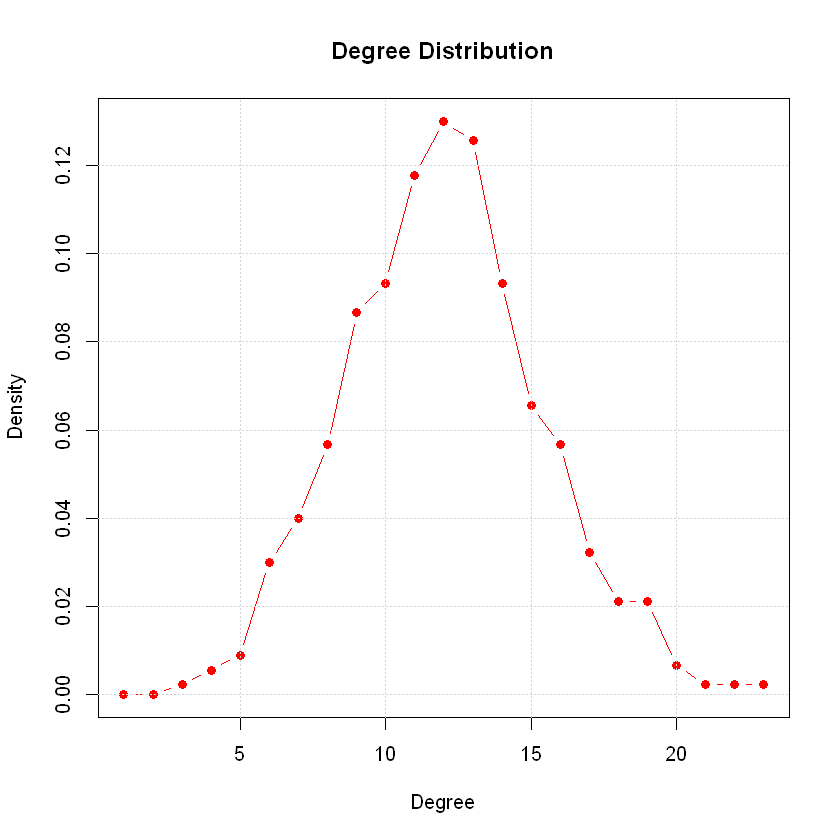

[1] "mean: 40.2555555555556"
[1] "var: 40.493016932394"


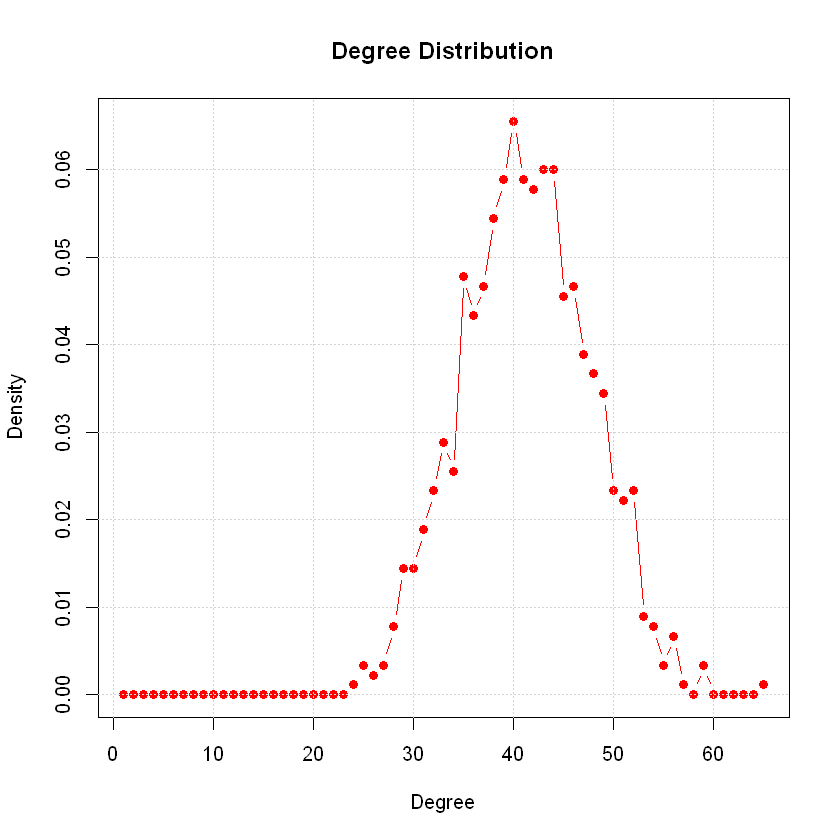

[1] "mean: 90.1777777777778"
[1] "var: 83.7659127425535"


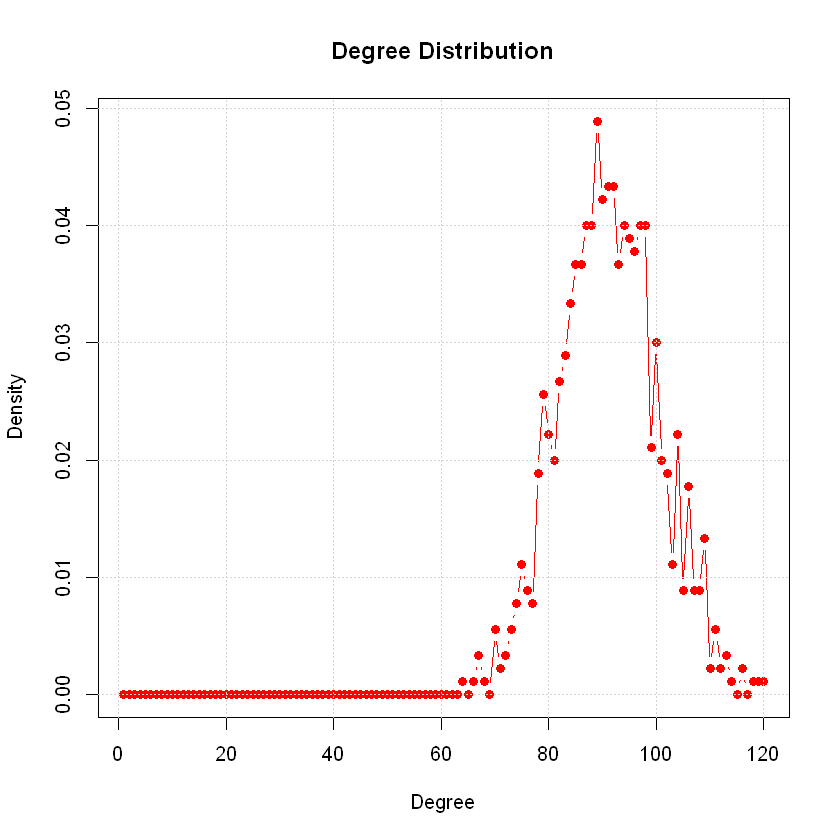

In [ ]:
# 1-(a) Responsibility : Sungho Cho
p_vec <- c(0.002, 0.006, 0.012, 0.045, 0.1)
n <- 900
for (p in p_vec){
  g <- sample_gnp(n, p, directed = FALSE)
  deg_dist <- degree_distribution(graph = g)
  deg <- degree(graph = g)
  plot(deg_dist, xlab = "Degree", ylab = "Density",
    main = "Degree Distribution", col = "red", type = "b", pch = 19)
  print(paste("mean:", mean(deg)))
  print(paste("var:", var(deg)))
  grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")
}

 In an Erdős–Rényi (ER) graph, $G(n,p)$ each pair of nodes is independently connected by an edge with probability $p$. Therefore, the probability of generating an ER graph with $n$ nodes and $M$ edges can be calculated as follows:
\begin{align}
  p^M(1-p)^{{n \choose 2} - M}
\end{align}
This is because in an undirected graph, there exist ${n \choose 2}$ possible edges between a pair of nodes, and we have to pick $M$ edges from them.

The distribution of the $\mathrm{degree}$ is binomial as we can see from the above figures. The probability that a node has $k$ degree can be obtained as follows:
\begin{align}
  p(k) = {n-1 \choose k}p^k(1-p)^{n-1-k}
\end{align}
This is because, for a node, it can have $n-1$ neighbor nodes, and the probability that each edge for the node exists is $p$. Thus, we have to choose $k$ edges from $n-1$ edges.

From this observation, the theoretical values of mean and variance is $E[k] = (n-1)p$ and $Var[k] = (n-1)p(1-p)$.

In [ ]:
# 1(b)
iter_num <- 1000
n <- 900
con_prob <- matrix(0, length(p_vec), 1)
diam_vec <- matrix(0, length(p_vec), 1)
for (p_i in 1:length(p_vec)){
    p = p_vec[p_i]
    flag <- 0
    for (iter_i in 1:iter_num){
        g = sample_gnp(n, p, directed = FALSE)
        if (is_connected(graph = g)){
            con_prob[p_i] <- con_prob[p_i] + 1
        }
        else if (!is_connected(graph = g) & !flag){
            flag = 1
            diam_vec[p_i] <- diameter(g)
        }
    }
}
con_prob <- con_prob / iter_num

In [ ]:
for (con_i in 1:length(p_vec)){
    cat("Probability that a generated network is connected with edge connection probability", p_vec[con_i], ":" , con_prob[con_i], "\n")
    cat("Diameter of GCC is", diam_vec[con_i], '\n\n')
}

Probability that a generated network is connected with edge connection probability 0.002 : 0 
Diameter of GCC is 30 

Probability that a generated network is connected with edge connection probability 0.006 : 0.016 
Diameter of GCC is 8 

Probability that a generated network is connected with edge connection probability 0.012 : 0.974 
Diameter of GCC is 5 

Probability that a generated network is connected with edge connection probability 0.045 : 1 
Diameter of GCC is 0 

Probability that a generated network is connected with edge connection probability 0.1 : 1 
Diameter of GCC is 0 



In [ ]:
# 1-(c)
p_vec <- seq(0.0001, 0.012, 0.00005)
iter_num <- 100
n <- 900
gcc_size_vec <- c()
gcc_size_mat <- matrix(nrow = length(p_vec), ncol = iter_num)
iter <- 1
for (p in p_vec){
    temp_max_comp <- c()
    for (i_iter in 1:iter_num){
        g <- sample_gnp(n, p, directed = FALSE)
        temp_max_comp <- c(temp_max_comp, max(components(g)$csize))
    }
    gcc_size_mat[iter, ] <- temp_max_comp
    gcc_size_vec <- c(gcc_size_vec, mean(temp_max_comp) / n) #normalized : /n
    iter <- iter + 1
}

The probability where a GCC starts to emerge:  0.0011 
Theoretical value where a GCC starts to emerge : 0.0011 


Empirical estimation of the value p where the GCC takes up over 99% of the nodes:  0.00765 
Theoretical value where the GCC take up over 99% of the nodes: 0.00756

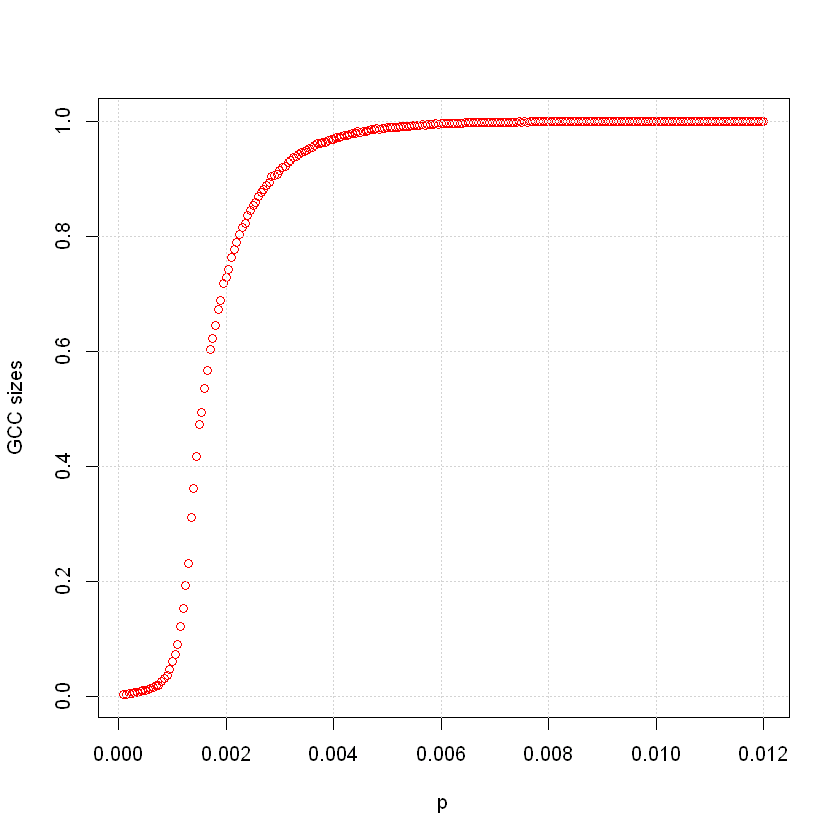

In [ ]:
plot(p_vec, gcc_size_vec, xlab = "p", ylab = "GCC sizes", col = "red")
grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")
cat("The probability where a GCC starts to emerge: ", p_vec[min(which(apply(gcc_size_mat /n, 1, max) >= 0.2))], '\n')
cat("Theoretical value where a GCC starts to emerge : 0.0011", "\n")
cat("Empirical estimation of the value p where the GCC takes up over 99% of the nodes: ",p_vec[sum(apply(gcc_size_mat, 1, max) / n > 0.99)], '\n')
cat("Theoretical value where the GCC take up over 99% of the nodes: 0.00756")

(1)
The probability was spanned from 0.0001 to 0.012 and 100 random graphs were generated for each $n$.
In this problem, we will define the criteria where GCC starts to emerge as the size of GCC taking up the network as more than $20\%$.
The value of $p$ where a GCC starts to emerge is $0.0011$, which corresponds to theoretical value, $\frac{1}{n}$.

(2)
Empirical estimation of the value p where the GCC emerges is $0.0069$, which corresponds to theoretical value, $\frac{\ln n}{n} = $.

In [ ]:
c <- 0.5
n_list <- seq(100, 10000, 10)
gcc_size_vec1 <- c()
for (n in n_list){
    p <- c/n
    temp <- c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp <- c(temp, max(components(g)$csize))
    }
    gcc_size_vec1 <- c(gcc_size_vec1, mean(temp))
}

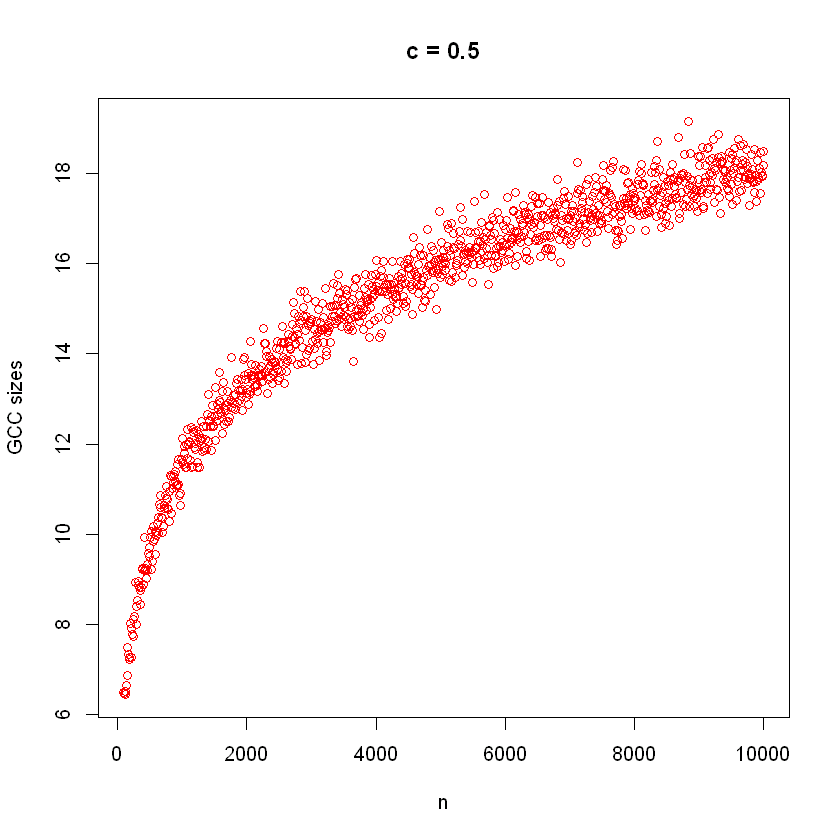

In [ ]:
plot(n_list, gcc_size_vec1, xlab = "n", ylab = "GCC sizes", main = "c = 0.5", col = "red")
grid()

In [ ]:
c <- 1
n_list <- seq(100, 10000, 10)
gcc_size_vec2 <- c()
for (n in n_list){
    p <- c/n
    temp = c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp = c(temp, max(components(g)$csize))
    }
    gcc_size_vec2 <- c(gcc_size_vec2, mean(temp))
}

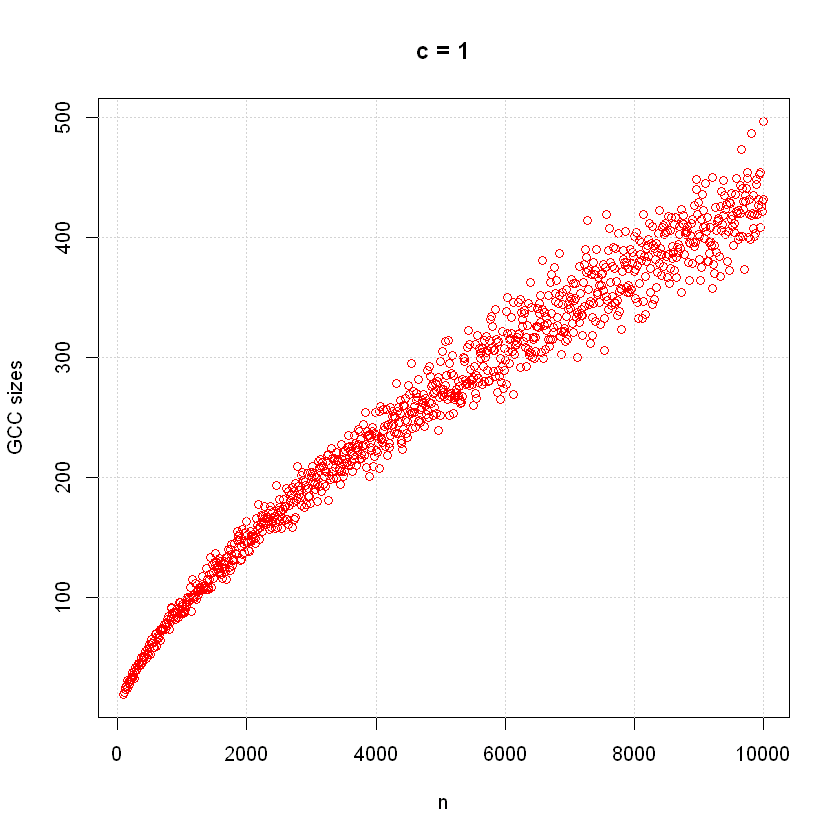

In [ ]:
plot(n_list, gcc_size_vec2, xlab = "n", ylab = "GCC sizes", main = "c = 1", col = "red")
grid()

We can see that the graphs become more linear as $c$ grows. At first, the graph looks like a logarithm but as $c$ increases, it becomes a kind of lienar function.

In [ ]:
c <- 1.15
n_list <- seq(100, 10000, 10)
gcc_size_vec3 <- c()
for (n in n_list){
    p <- c/n
    temp <- c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp <- c(temp, max(components(g)$csize))
    }
    gcc_size_vec3 <- c(gcc_size_vec3, mean(temp))
}

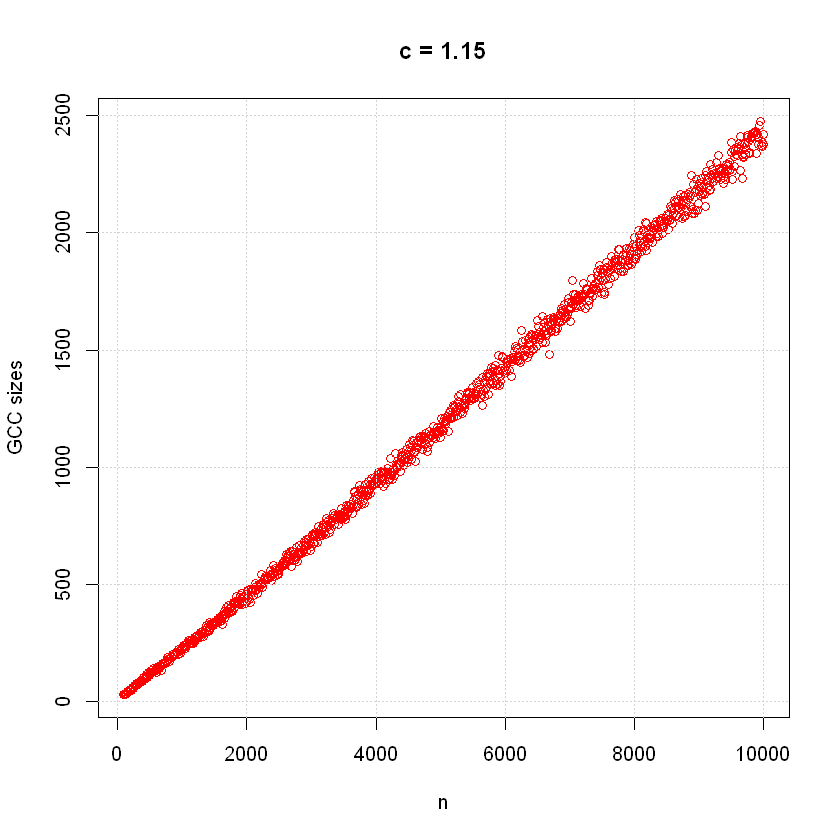

In [ ]:
plot(n_list, gcc_size_vec3, xlab = "n", ylab = "GCC sizes", main = "c = 1.15", col = "red")
grid()

In [ ]:
c <- 1.25
n_list <- seq(100, 10000, 10)
gcc_size_vec4 <- c()
for (n in n_list){
    p <- c/n
    temp = c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp = c(temp, max(components(g)$csize))
    }
    gcc_size_vec4 <- c(gcc_size_vec4, mean(temp))
}

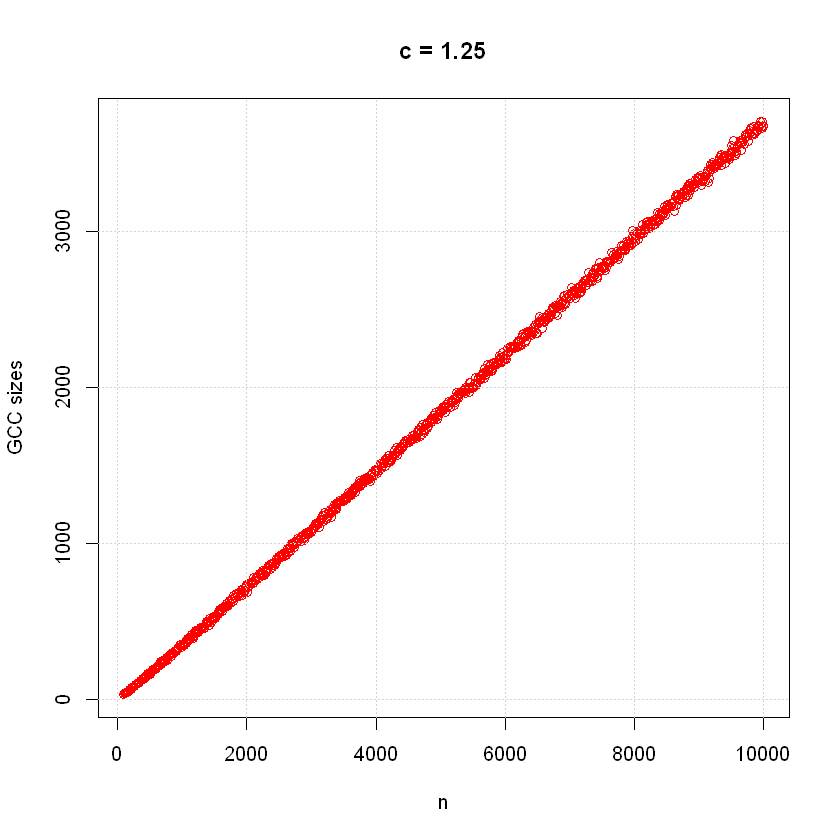

In [ ]:
plot(n_list, gcc_size_vec4, xlab = "n", ylab = "GCC sizes", main = "c = 1.25", col = "red")
grid()

In [ ]:
c <- 1.35
n_list <- seq(100, 10000, 10)
gcc_size_vec5 <- c()
for (n in n_list){
    p <- c/n
    temp = c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp = c(temp, max(components(g)$csize))
    }
    gcc_size_vec5 <- c(gcc_size_vec5, mean(temp))
}

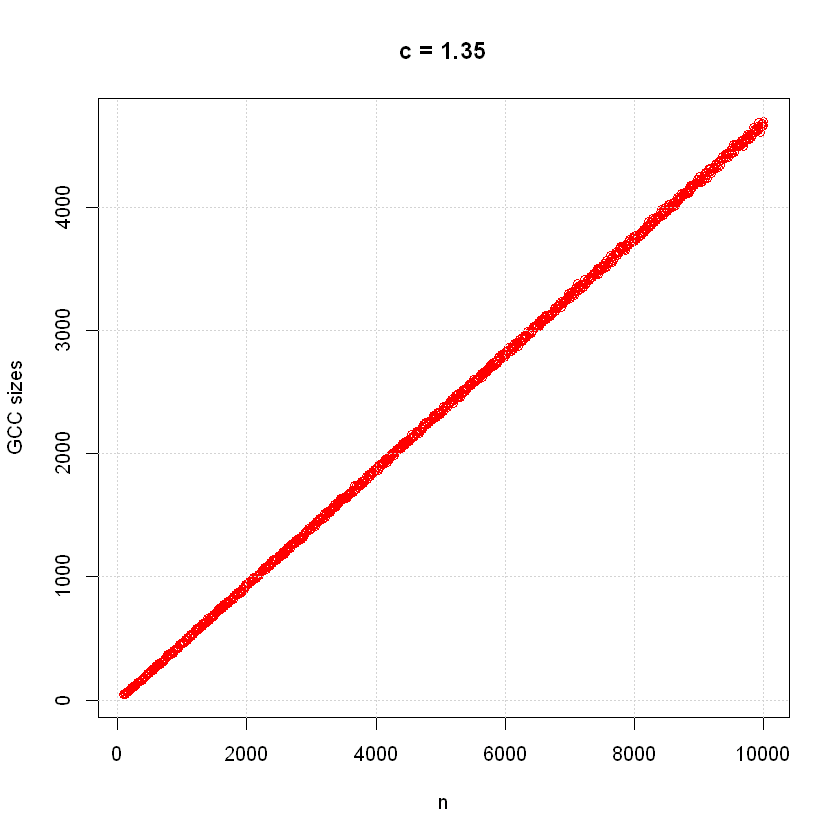

In [ ]:
plot(n_list, gcc_size_vec5, xlab = "n", ylab = "GCC sizes", main = "c = 1.35", col = "red")
grid()

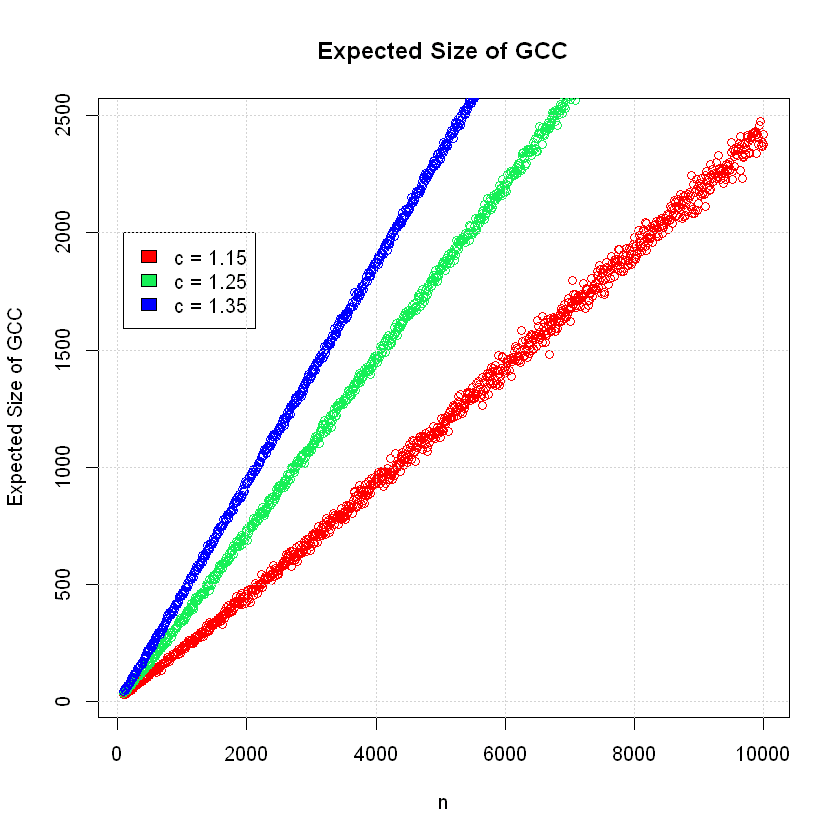

In [ ]:
plot(n_list,gcc_size_vec3 ,col='red',main= "Expected Size of GCC",xlab="n",ylab="Expected Size of GCC")
points(n_list, gcc_size_vec4, col="#16f057")
points(n_list, gcc_size_vec5, col="blue")
legend(100, 2000, legend = c("c = 1.15", "c = 1.25", "c = 1.35"), fill = c("red", "#16f057", "blue", lty=0, cex=1.5))
grid()

Expected size of GCC is proportional to $c$. For a given $n$, if $c$ increases, the probability that an edge is drawn between two vertices also grows. Thus, the size of GCC should increase when $c$ increases.
In a nutshell, if $c$ increases, the graphs become linear and the slope also increases.